In [1]:
# Import all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

# Load data

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape

In [3]:
print("Head Values:")
df.head()

Head Values:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Tail Values:")
df.tail()

Tail Values:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

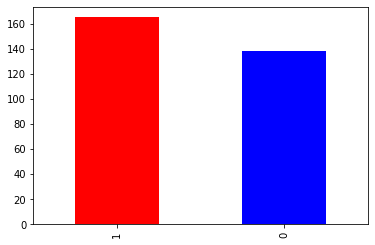

In [8]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

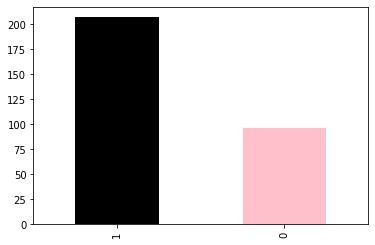

In [10]:
df["sex"].value_counts().plot(kind="bar", color=["Black", "Pink"]);

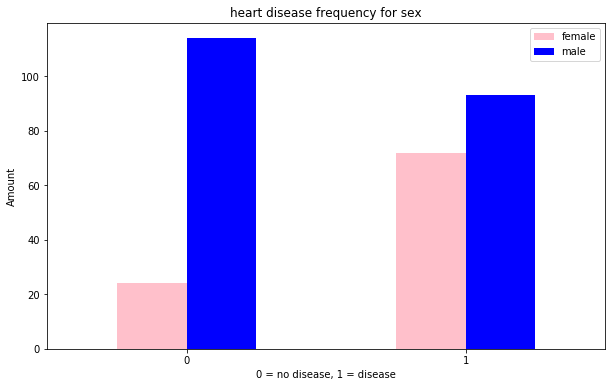

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink","blue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);

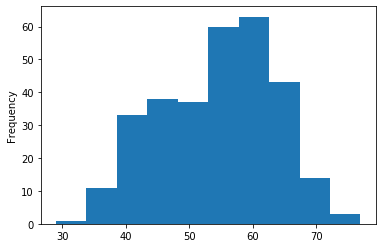

In [12]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

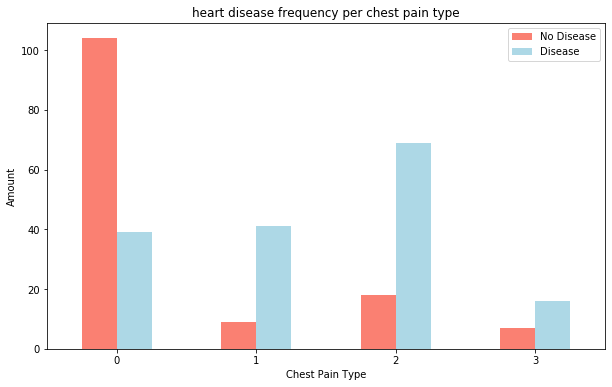

In [13]:
# make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])

# Add some communication
plt.title("heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [14]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

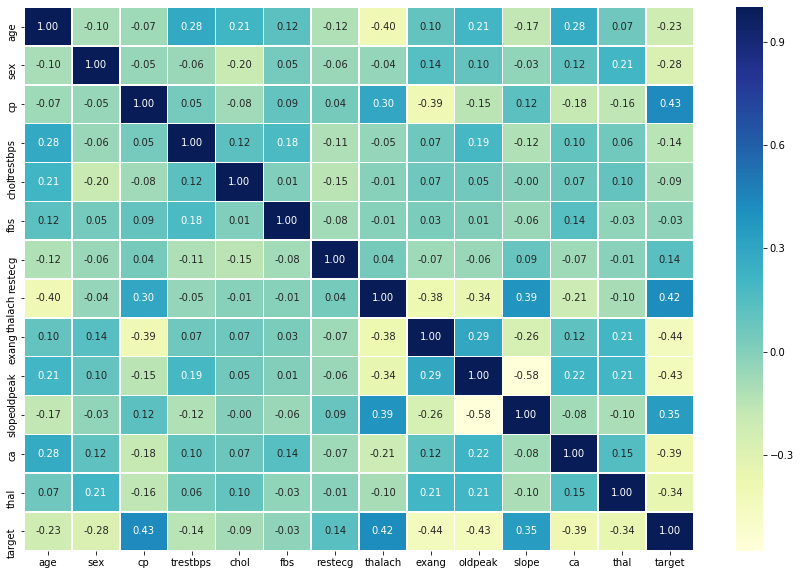

In [15]:
# let's make now correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot =True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

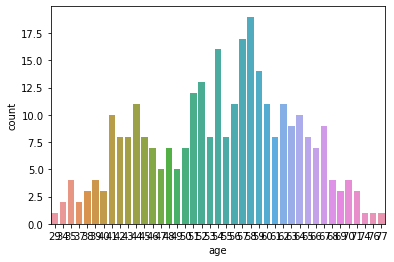

In [16]:
sns.countplot(df['age'])
plt.show()

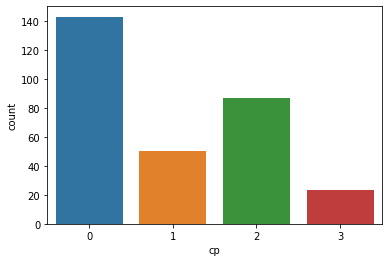

In [17]:
sns.countplot(df['cp'])
plt.show()

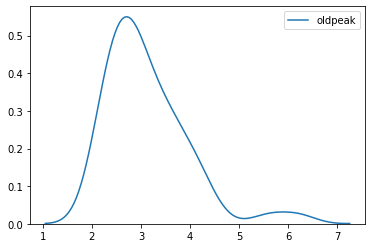

In [18]:
sns.kdeplot(df.query('oldpeak > 2').oldpeak)

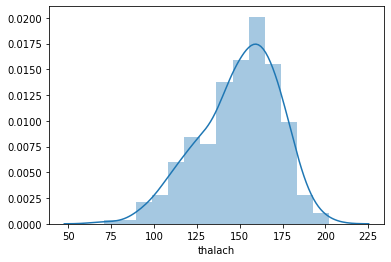

In [19]:
sns.distplot(df['thalach'])

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

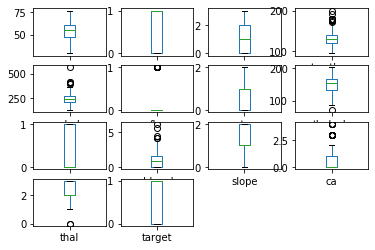

In [20]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000146A3D85C48>,
      dtype=object)

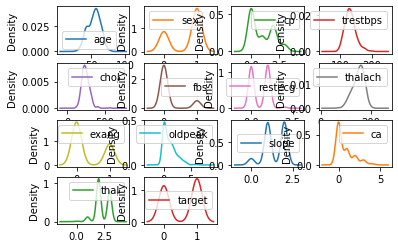

In [21]:
df.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

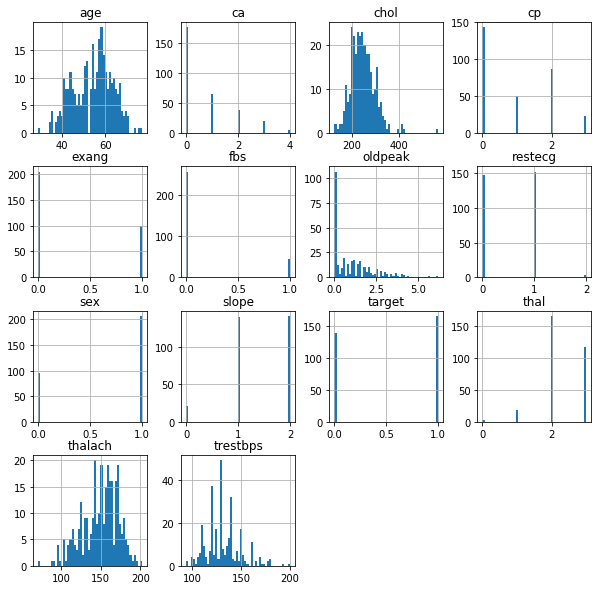

In [22]:
df.hist(figsize=(10,10),bins=50)
plt.show()

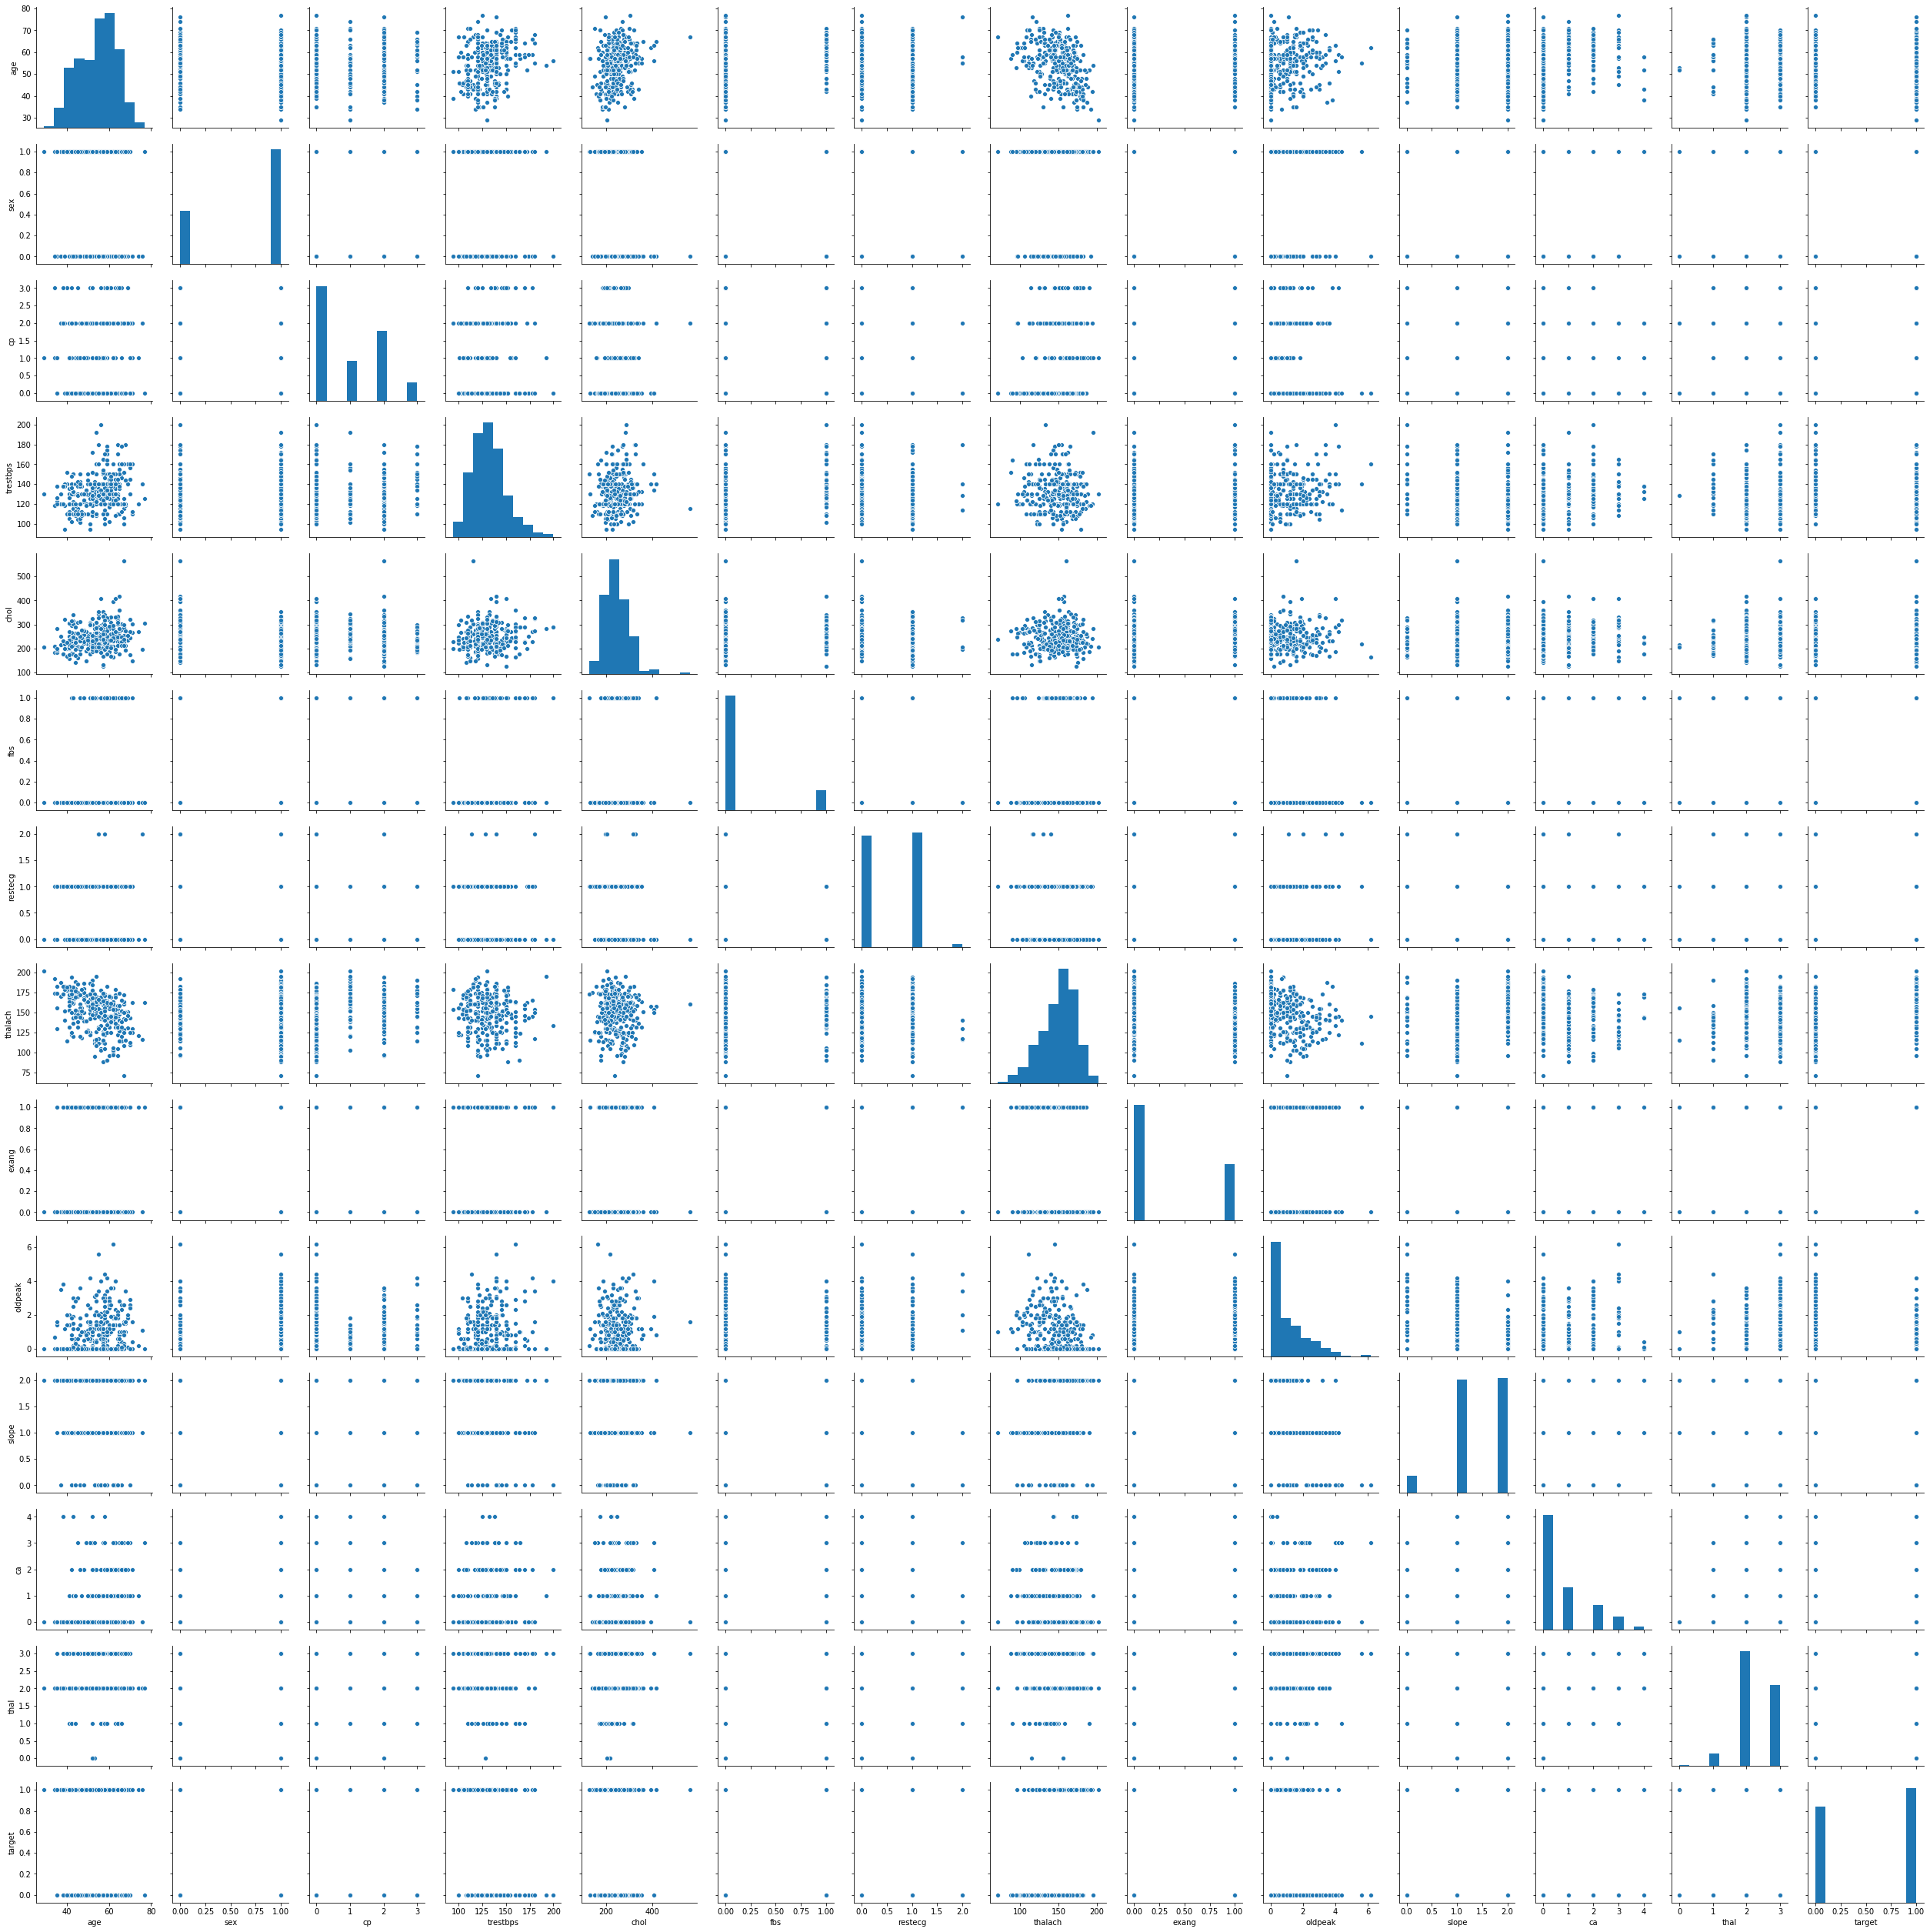

In [23]:
sns.pairplot(df)

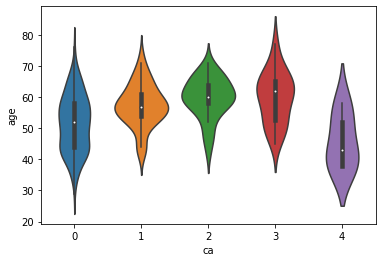

In [24]:
sns.violinplot(x='ca', y='age', data=df)

In [25]:
# split data into x and y
X = df.drop("target",axis=1)
Y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(42)

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2)

In [28]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [29]:
Y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

## Using Logistic Regression:

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8688524590163934


In [31]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[25  4]
 [ 4 28]]


## Using KNN:

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.6557377049180327


## Using SVC:

In [33]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.5409836065573771


## Using DecisionTree:

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.819672131147541


## Using GaussianNB:

In [35]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.8688524590163934


## Using RandomForest:

In [36]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7540983606557377


## Using Xgboost:

In [40]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

[15:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.819672131147541


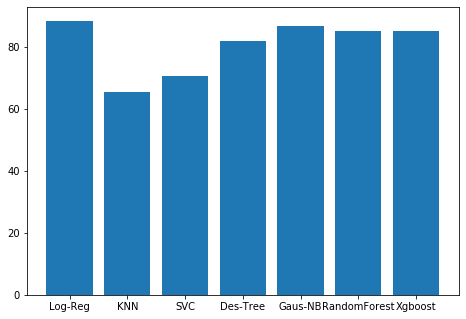

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Log-Reg', 'KNN', 'SVC', 'Des-Tree', 'Gaus-NB', 'RandomForest', 'Xgboost']
students = [88.52,65.57,70.49,81.96,86.88,85.24,85.24]
ax.bar(langs,students)
plt.show()

# Hence we will use LogisticRegression algorithms for training my model.